In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def imshow(title='Image', image=None, size=10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size*aspect_ratio, size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

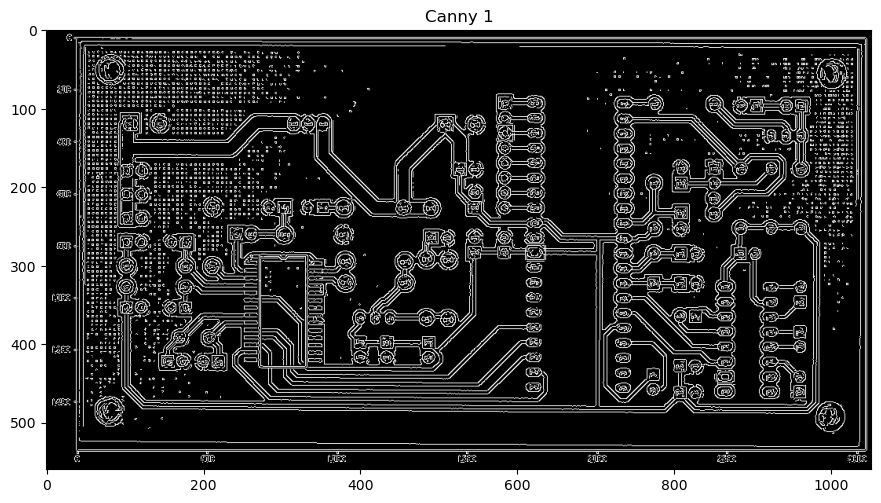

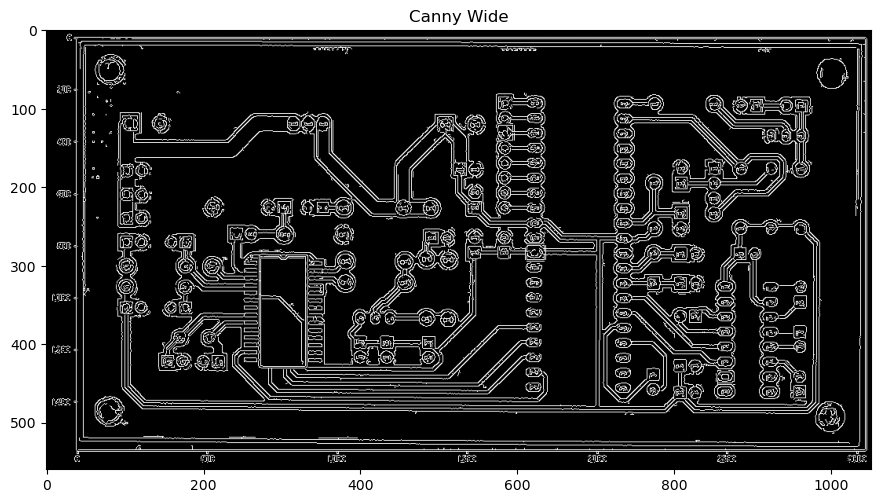

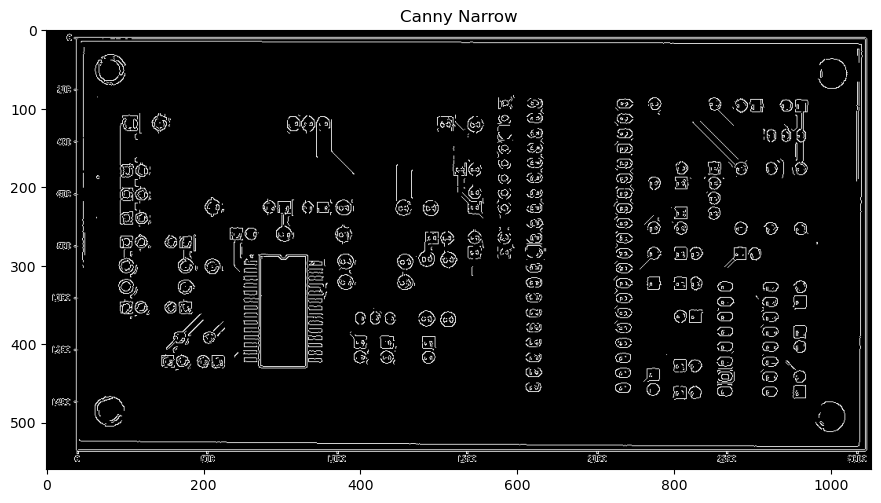

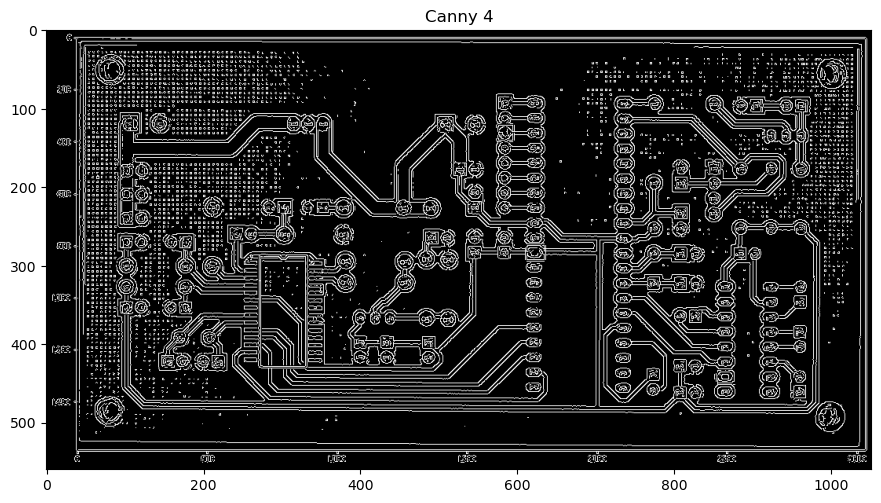

In [3]:
image = cv2.imread('./missing_hole_detected.png',0)

# Canny Edge Detection uses gradient values as thresholds
# The first threshold gradient
canny = cv2.Canny(image, 50, 120)
imshow('Canny 1', canny, 20)

# Wide edge thresholds expect lots of edges
canny = cv2.Canny(image, 10, 200)
imshow('Canny Wide', canny, 20)

# Narrow threshold, expect less edges 
canny = cv2.Canny(image, 200, 240)
imshow('Canny Narrow', canny, 20)

canny = cv2.Canny(image, 60, 110)
imshow('Canny 4', canny, 20)

##  Then, we need to provide two values: threshold1 and threshold2. Any gradient value larger than threshold2
# is considered to be an edge. Any value below threshold1 is considered not to be an edge. 
#Values in between threshold1 and threshold2 are either classiﬁed as edges or non-edges based on how their 
#intensities are “connected”. In this case, any gradient values below 60 are considered non-edges
#whereas any values above 120 are considered edges.

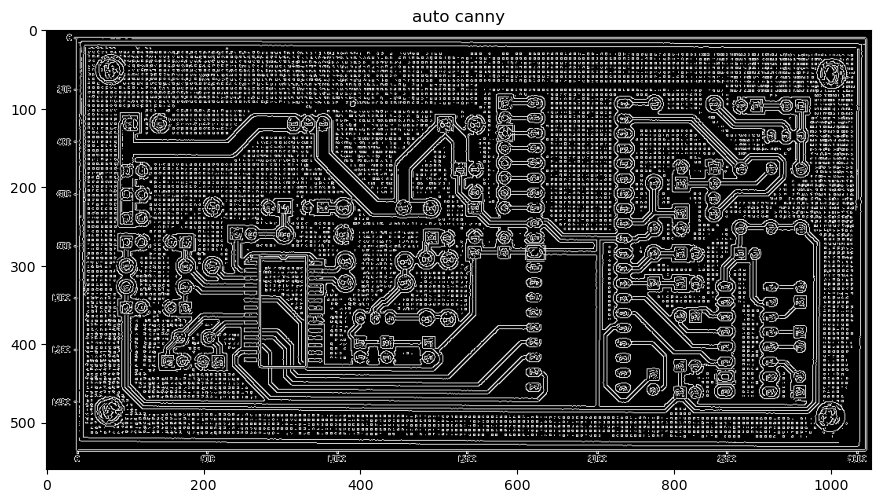

In [4]:
def autoCanny(image):
  # Finds optimal thresholds based on median image pixel intensity
  blurred_img = cv2.blur(image, ksize=(5,5))
  med_val = np.median(image) 
  lower = int(max(0, 0.66 * med_val))
  upper = int(min(255, 1.33 * med_val))
  edges = cv2.Canny(image=image, threshold1=lower, threshold2=upper)
  return edges

auto_canny = autoCanny(image)
imshow("auto canny", auto_canny, 20)

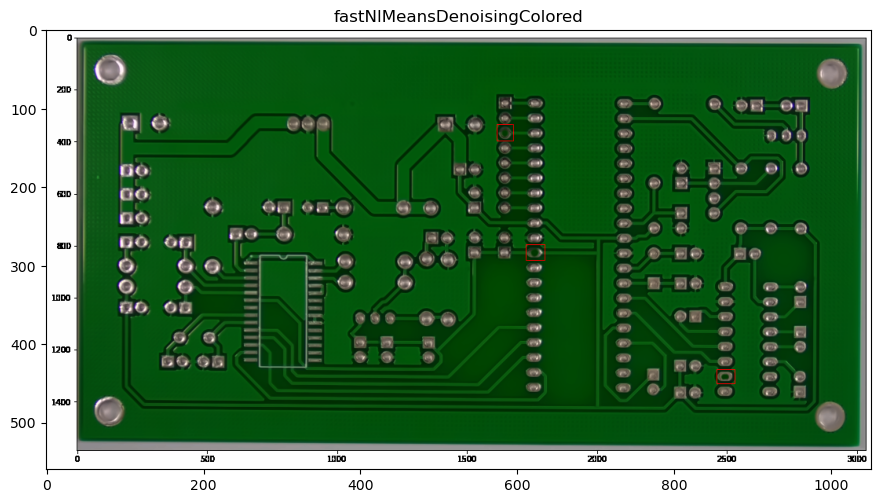

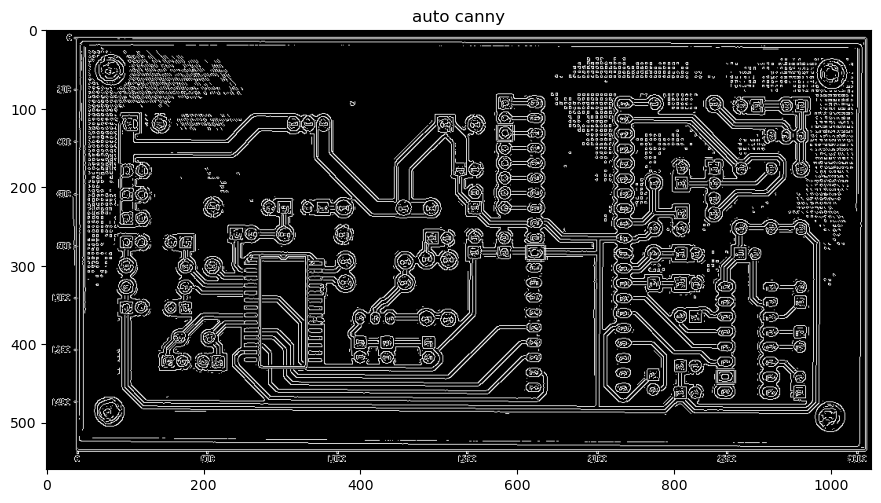

In [9]:
image = cv2.imread('./missing_hole_detected.png')

dst = cv2.fastNlMeansDenoisingColored(image, None, 6, 6, 7, 21)
imshow('fastNlMeansDenoisingColored', dst, 20)

auto_canny = autoCanny(dst)
imshow("auto canny", auto_canny, 20)

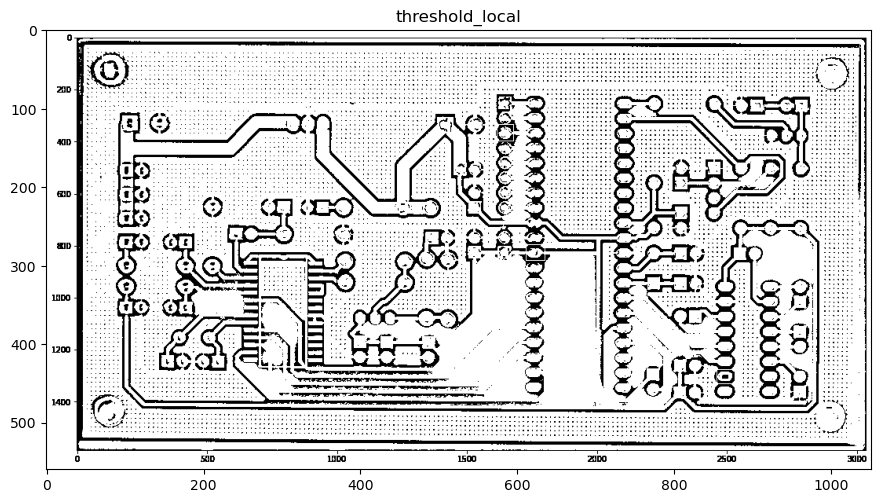

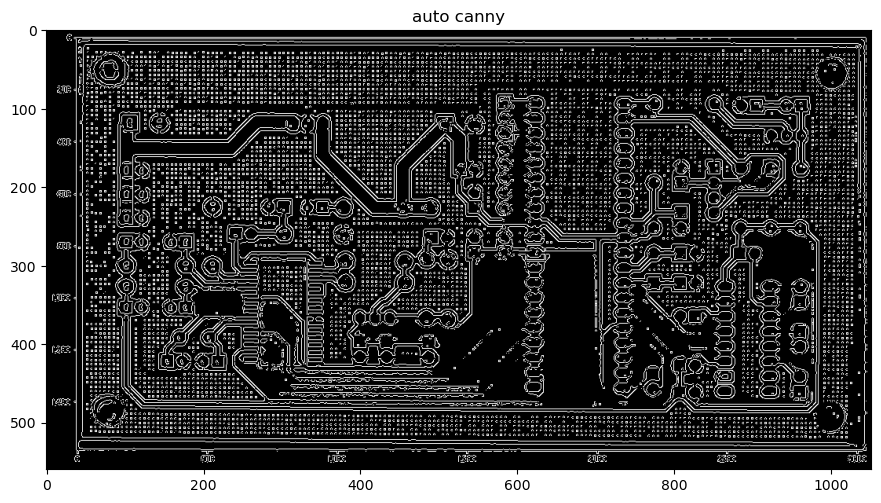

In [15]:
from skimage.filters import threshold_local

image = cv2.imread('./missing_hole_detected.png')

# We get the Value component from the HSV color space 
# then we apply adaptive thresholdingto 
V = cv2.split(cv2.cvtColor(image, cv2.COLOR_BGR2HSV))[2]
T = threshold_local(V, 25, offset=15, method="gaussian")

# Apply the threshold operation 
thresh = (V > T).astype("uint8") * 255
imshow("threshold_local", thresh, 20)

auto_canny = autoCanny(thresh)
imshow("auto canny", auto_canny, 20)